# Drowsiness Detection

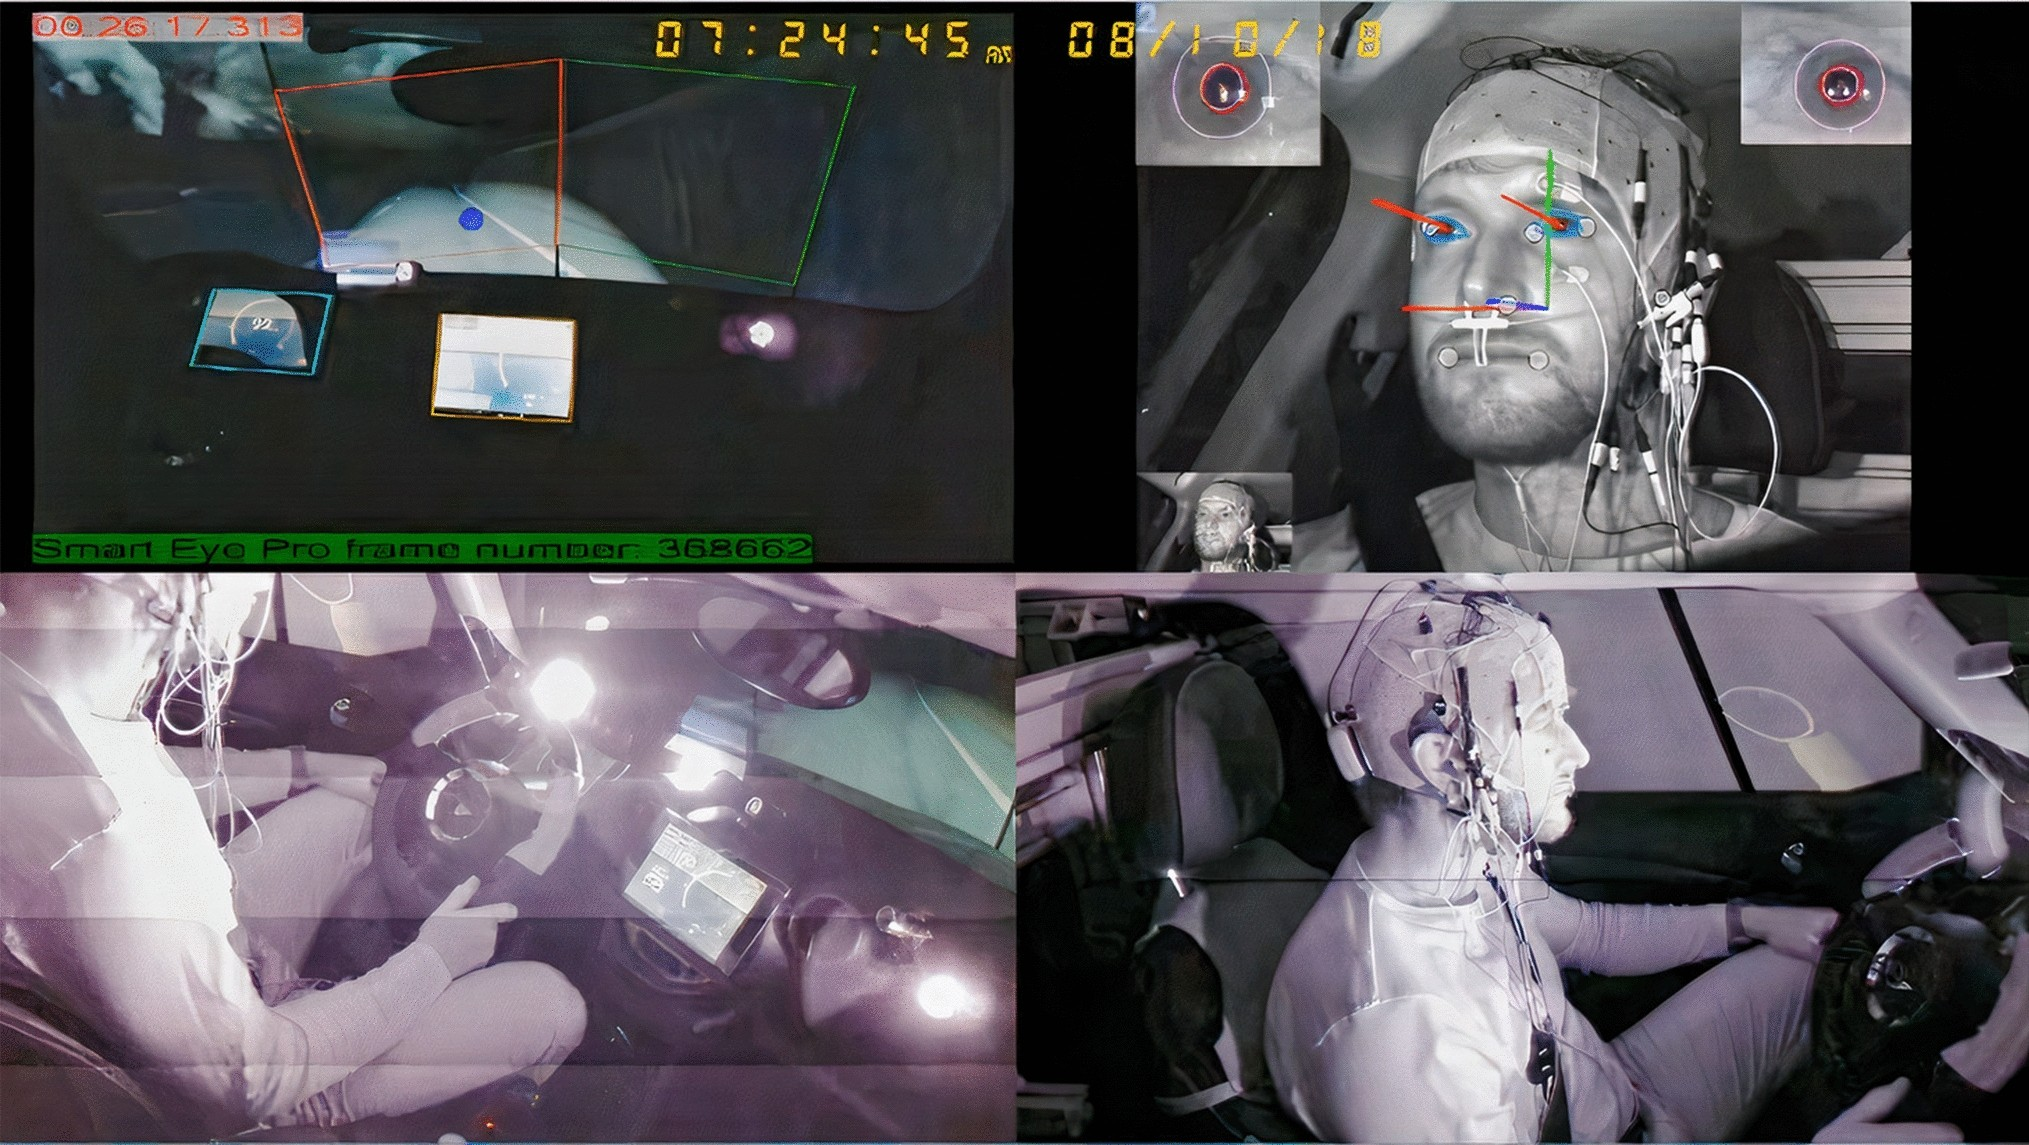

## Installing Dependencies

In [2]:
!pip3 install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cpu

Looking in indexes: https://download.pytorch.org/whl/nightly/cpu


In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16263, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 16263 (delta 60), reused 76 (delta 23), pack-reused 16103
Receiving objects: 100% (16263/16263), 15.09 MiB | 18.11 MiB/s, done.
Resolving deltas: 100% (11091/11091), done.


In [3]:
cd yolov5

/content/yolov5


In [4]:
!pip install -r requirements.txt --quiet

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Load the model

In [2]:
# Loading the model from ultralytics, s/m/l the size can be optional
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'Pillow>=10.0.1'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 151.8 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 9.6s, installed 2 packages: ['gitpython>=3.1.30', 'Pillow>=10.0.1']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-1-7 Python-3.10.12 torch-2.1.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 130MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [10]:
img_url = 'https://github.com/ultralytics/yolov5/raw/master/data/images/zidane.jpg'


In [ ]:
results = model(img_url)
results.print() # print all the metadata

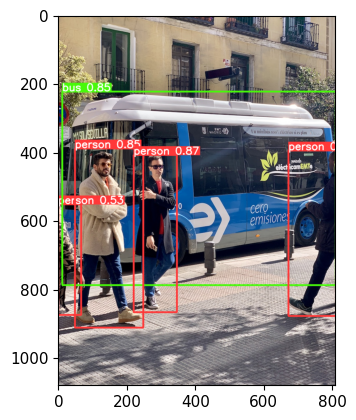

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
results.render()

[array([[[172, 148, 122],
         [170, 146, 120],
         [177, 153, 125],
         ...,
         [184, 170, 157],
         [185, 171, 158],
         [185, 171, 158]],
 
        [[177, 153, 127],
         [174, 150, 124],
         [179, 155, 127],
         ...,
         [185, 171, 158],
         [186, 172, 159],
         [186, 172, 159]],
 
        [[178, 154, 128],
         [176, 152, 126],
         [178, 154, 126],
         ...,
         [185, 171, 158],
         [185, 171, 158],
         [185, 171, 158]],
 
        ...,
 
        [[191, 185, 185],
         [188, 182, 182],
         [185, 179, 179],
         ...,
         [112, 107, 114],
         [111, 105, 115],
         [112, 106, 116]],
 
        [[163, 157, 157],
         [186, 180, 180],
         [190, 186, 185],
         ...,
         [103,  97, 107],
         [ 98,  92, 102],
         [104,  98, 108]],
 
        [[118, 112, 112],
         [166, 160, 160],
         [174, 170, 169],
         ...,
         [ 95,  89,  99],
  

# Real time detection

In [12]:
cap = cv2.VideoCapture(1) # activate webcam
while cap.isOpened():
    ret, frame = cap.read() # success as return value, and objects detected

    # Make detections
    results = model(frame) # Those objects passed to the model

    cv2.imshow('Detect', np.squeeze(results.render())) #np.squeeze neglects any extra dimensions

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Train the model

In [13]:
import uuid   # Unique identifier
import os
import time

In [14]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 10 # Collect 10 images for each label

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    # Loop through image per label
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        # Webcam feed - Takes pictures and saves it in the data/images with a label and a number
        ret, frame = cap.read()

        # Naming out image path - Saving it to folder images | uuid for uniqueness
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')

        # Writes out image to file from the webcam capture
        cv2.imwrite(imgname, frame)

        # Render to the screen
        cv2.imshow('Image Collection', frame)

        # 2 second delay between captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
# Labelling the images
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

Using the labelImg app to label the images

In [15]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 32.36 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [17]:
!pip3 install pyqt5 lxml # Install qt and 1xmi by pip
!make at5p3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 8.3 MB/s eta 0:00:00
make: *** No rule to make target 'at5p3'.  Stop.


In [ ]:
# cd into yolo5, use the train.py folder in it, size of the img, no.of epochs, create the yml file according to yolov5, weights by default and the s/m/l version of yolo
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers

## Load Custom Model

In [ ]:
# Direct the trained weights to the custom model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

In [ ]:
# Test with the webcam feed

cap = cv2.VideoCapture(1) # activate webcam
while cap.isOpened():
    ret, frame = cap.read() # success as return value, and objects detected

    # Make detections
    results = model(frame) # Those objects passed to the model

    cv2.imshow('Detect', np.squeeze(results.render())) #np.squeeze neglects any extra dimensions

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()